# **Тема 1. Моделирование геометрической вероятности**

Смоделируйте вычисление геометрической вероятности (на примере из лекции про метание дротиков в игровой круг, площадь которого в два раза меньше площади стены). Показать теоретический расчет и графическую иллюстрацию для рассматриваемого примера.

## **Задача**

Два человека независимо друг от друга приходят в ресторан с 12:00 до 13:00.
Каждый из них ждёт другого не более 15 минут, после чего уходит.
Требуется найти вероятность того, что они встретятся.

## **Теоретический расчет**

Рассмотрим событие $A$ — встреча в ресторане.

Пусть $X, Y$ — моменты прихода двух людей (в минутах от 0 до 60 относительно 12:00).

Тогда пространство исходов — квадрат, с площадью:

$$
S_\text{общая} = 60^2 = 3600
$$

Учитывая условие встречи $ |X - Y| \le 15 $, благоприятствующая область образует полосу вдоль диагонали квадрата, ограниченную двумя прямыми:
$$ Y = X - 15 $$ $$ Y = X + 15 $$

Два треугольника в противоположных углах не удовлетворяют условию, вычтем их площадь:

$$
S_\text{встречи} = 3600 - 2 \cdot \frac{45^2}{2} = 3600 - 2025 = 1575
$$

Вероятность встречи:

$$
P(\text{A}) = \frac{S_\text{встречи}}{S_\text{общая}} = \frac{1575}{3600} = 0.4375
$$

## **Моделирование**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

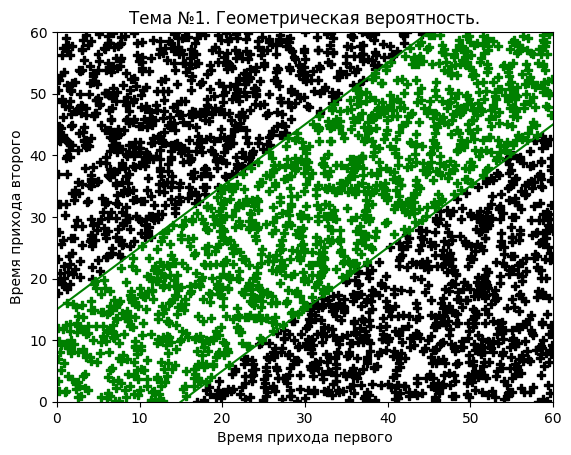

1308 встреч из 3000 симуляций.
Частотная вероятность ≈ 0.436
Классическая вероятность = 0.4375


In [3]:
def meeting(size):
    total = 60
    waiting = 15

    X = np.random.uniform(0, total, size)
    Y = np.random.uniform(0, total, size)

    meet_mask = np.abs(X - Y) <= waiting

    plt.scatter(X[~meet_mask], Y[~meet_mask], c='k', marker='P')
    plt.scatter(X[meet_mask], Y[meet_mask], c='g', marker='P')

    x = np.linspace(0, total, 100)
    plt.plot(x, x + waiting, c='g')
    plt.plot(x, x - waiting, c='g')

    meet = np.sum(meet_mask)
    freq_prob = meet / size

    probability = 1 - ((total - waiting) ** 2) / (total ** 2)

    plt.xlim(0, total)
    plt.ylim(0, total)

    plt.title('Тема №1. Геометрическая вероятность.')
    plt.xlabel('Время прихода первого')
    plt.ylabel('Время прихода второго')

    plt.show()

    return meet, freq_prob, probability

size = 3000
meet, freq_prob, probability = meeting(size)

print(f'{meet} встреч из {size} симуляций.')
print(f'Частотная вероятность ≈ {freq_prob:.3f}')
print(f'Классическая вероятность = {probability:.4f}')
